## Prueba Nexarte Fabian Niño

1. Realice un análisis exploratorio de datos para investigar visualmente las diferencias salariales. Para ello cargue los
datos usando Python. Ajuste y transforme el formato de los datos donde considere necesario.

In [1]:
#Importamos y cargamos la base con visualización de pocos datos
import pandas as pd
import matplotlib.pyplot as plt
base=pd.read_csv(r'C:\Users\Fankrit\Desktop\Trabajos\PRUEBA NEXARTE\Anexo Parte 1 - glassdoordata.csv')  
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   jobtitle     1000 non-null   object
 1   gender       1000 non-null   object
 2   age          1000 non-null   int64 
 3   performance  1000 non-null   int64 
 4   education    1000 non-null   object
 5   department   1000 non-null   object
 6   seniority    1000 non-null   int64 
 7   income       1000 non-null   int64 
 8   bonus        1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [2]:
base.head(5)

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


2. Calcule las siguientes medidas:
<br>
a. Top 10 del pago total por cargo.

In [3]:
#ordenar por cargo y sumar por ese item
df2=pd.DataFrame(base)
data = df2.groupby('jobtitle').sum()
data

,age,performance,seniority,income,bonus
jobtitle,,,,,
Data Scientist,4428,318,316,9890376,693894
Driver,3838,279,268,8133781,582098
Financial Analyst,4365,350,315,10164666,685522
Graphic Designer,3986,306,305,8907468,664636
IT,4050,300,276,8710797,604121
Manager,3828,243,262,11279664,545632
Marketing Associate,4915,345,359,9045452,725199
Sales Associate,3986,263,279,8779270,589784
Software Engineer,4455,341,319,11501128,724466


<Figure size 432x288 with 0 Axes>

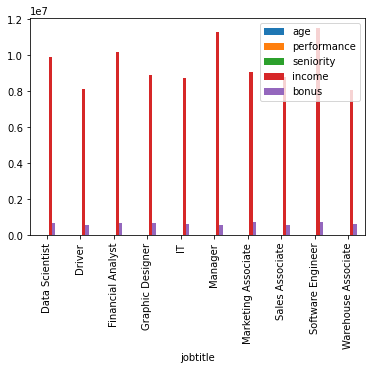

In [4]:
plt.clf()
df2.groupby('jobtitle').sum().plot(kind='bar')
plt.show()

b. Nivel educativo mejor pago.

In [5]:
#Nivel educativo mejor pago según la sumatoria
education = df2.groupby('education').sum()
education.sort_values('education',ascending=False)['income']

education
PhD            23771625
Masters        24984459
High School    23514059
College        22202510
Name: income, dtype: int64

In [6]:
#Nivel educativo mejor pago según promedio
education = df2.groupby('education').mean()
education.sort_values('education',ascending=False)['income']

education
PhD            99880.777311
Masters        97595.542969
High School    88732.298113
College        92126.597510
Name: income, dtype: float64

<Figure size 432x288 with 0 Axes>

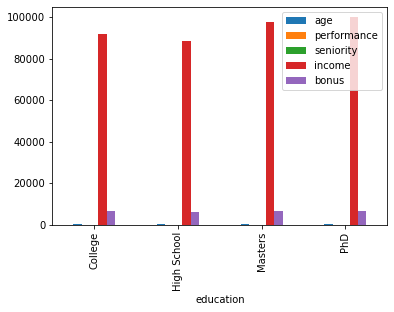

In [7]:
#Graficación del nivel educativo que más gana según promedio
plt.clf()
df2.groupby('education').mean().plot(kind='bar')
plt.show()

c. La mediana de hombres y mujeres.

In [8]:
#Mediana de hombres y mujeres
df2=pd.DataFrame(base)
data = df2.groupby('gender').mean()['age']
data

gender
Female    41.829060
Male      41.009398
Name: age, dtype: float64

d. Media y desviación del rendimiento por cargo.

In [9]:
#Media rendimiento por cargo
education = df2.groupby('jobtitle').mean()
education.sort_values('jobtitle',ascending=False)['performance']

jobtitle
Warehouse Associate    3.244444
Software Engineer      3.128440
Sales Associate        2.797872
Marketing Associate    2.923729
Manager                2.700000
IT                     3.125000
Graphic Designer       3.122449
Financial Analyst      3.271028
Driver                 3.065934
Data Scientist         2.971963
Name: performance, dtype: float64

In [10]:
#Desviación rendimiento por cargo
education = df2.groupby('jobtitle').std()
education.sort_values('jobtitle',ascending=False)['performance']

jobtitle
Warehouse Associate    1.416683
Software Engineer      1.515970
Sales Associate        1.387965
Marketing Associate    1.409108
Manager                1.302116
IT                     1.481464
Graphic Designer       1.466220
Financial Analyst      1.418011
Driver                 1.340002
Data Scientist         1.423906
Name: performance, dtype: float64

e. Departamento con personal de mayor antigüedad.

In [11]:
#Departamento con mayor edad
education = df2.groupby('department').mean()
education.sort_values('age',ascending=False).iloc[0]
#education

age               42.777778
performance        3.024155
seniority          2.879227
income         97722.801932
bonus           6193.280193
Name: Sales, dtype: float64

In [12]:
#opción 2
education.sort_values('age',ascending=False).max()

age               42.777778
performance        3.130208
seniority          3.140625
income         97722.801932
bonus           6770.442708
dtype: float64

3. Encuentre la distribución de los pagos totales de cada género, use la herramienta estadística más adecuada.

In [13]:
pd.value_counts(df2['gender'])

Male      532
Female    468
Name: gender, dtype: int64

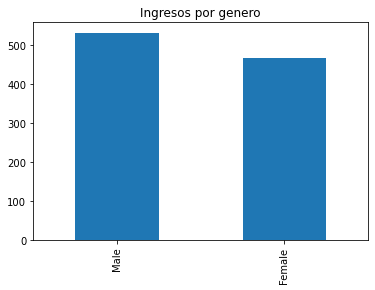

In [14]:
plot = df2['gender'].value_counts().plot(kind='bar',
                                            title='Ingresos por genero')

4. Estime la correlación entre las variables categóricas que pueden influir en la hipótesis planteada. ¿Qué variables son
más significativas para comprobar la hipótesis?

In [18]:
#convertimos la variable categorica en numerica
pd3=pd.get_dummies(df2,columns=['jobtitle'])
pd3.head(3)

,gender,age,performance,education,department,seniority,income,bonus,jobtitle_Data Scientist,jobtitle_Driver,jobtitle_Financial Analyst,jobtitle_Graphic Designer,jobtitle_IT,jobtitle_Manager,jobtitle_Marketing Associate,jobtitle_Sales Associate,jobtitle_Software Engineer,jobtitle_Warehouse Associate
0,Female,18,5,College,Operations,2,42363,9938,0,0,0,1,0,0,0,0,0,0
1,Male,21,5,College,Management,5,108476,11128,0,0,0,0,0,0,0,0,1,0
2,Female,19,4,PhD,Administration,5,90208,9268,0,0,0,0,0,0,0,0,0,1


In [20]:
pd3.corr()

,age,performance,seniority,income,bonus,jobtitle_Data Scientist,jobtitle_Driver,jobtitle_Financial Analyst,jobtitle_Graphic Designer,jobtitle_IT,jobtitle_Manager,jobtitle_Marketing Associate,jobtitle_Sales Associate,jobtitle_Software Engineer,jobtitle_Warehouse Associate
age,1.000000,-0.056875,-0.021414,0.562681,-0.414337,-0.000238,0.017336,-0.014503,-0.016600,0.018121,0.025100,0.006644,0.022798,-0.012765,-0.044846
performance,-0.056875,1.000000,-0.021127,-0.053622,0.855500,-0.015818,0.006432,0.056919,0.019790,0.020149,-0.074465,-0.029110,-0.054119,0.022472,0.045838
seniority,-0.021414,-0.021127,1.000000,0.511096,0.194982,-0.004401,-0.005887,-0.006721,0.033390,-0.022437,-0.013508,0.018723,-0.000673,-0.011136,0.011553
income,0.562681,-0.053622,0.511096,1.000000,-0.129481,-0.027873,-0.063599,0.007165,-0.046597,-0.048064,0.383184,-0.257322,-0.013688,0.152506,-0.061054
bonus,-0.414337,0.855500,0.194982,-0.129481,1.000000,0.003081,-0.011131,-0.010438,0.051801,-0.028341,-0.063511,-0.058681,-0.031009,0.031306,0.121683
jobtitle_Data Scientist,-0.000238,-0.015818,-0.004401,-0.027873,0.003081,1.000000,-0.109523,-0.119821,-0.114097,-0.112802,-0.108860,-0.126611,-0.111498,-0.121071,-0.108860
jobtitle_Driver,0.017336,0.006432,-0.005887,-0.063599,-0.011131,-0.109523,1.000000,-0.109523,-0.104291,-0.103107,-0.099504,-0.115730,-0.101915,-0.110666,-0.099504
jobtitle_Financial Analyst,-0.014503,0.056919,-0.006721,0.007165,-0.010438,-0.119821,-0.109523,1.000000,-0.114097,-0.112802,-0.108860,-0.126611,-0.111498,-0.121071,-0.108860
jobtitle_Graphic Designer,-0.016600,0.019790,0.033390,-0.046597,0.051801,-0.114097,-0.104291,-0.114097,1.000000,-0.107414,-0.103660,-0.120564,-0.106172,-0.115288,-0.103660
jobtitle_IT,0.018121,0.020149,-0.022437,-0.048064,-0.028341,-0.112802,-0.103107,-0.112802,-0.107414,1.000000,-0.102483,-0.119195,-0.104967,-0.113979,-0.102483


6. Utilizando técnicas de regresión lineal (o métodos estadísticos de modelamiento que pueda proponer), sobre este
conjunto de datos encuentre la tendencia de los datos según pago total, cargo y edad.

C:\Users\Fankrit\AppData\Local\Temp\ipykernel_5168\37884987.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2.drop(['jobtitle','income','age'],1).hist()


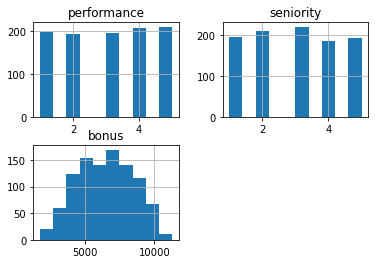

In [15]:
# Visualizamos rápidamente las caraterísticas de entrada
df2.drop(['jobtitle','income','age'],1).hist()
plt.show()

In [25]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [38]:
X = df2.iloc[:, 7].values.reshape(-1, 1) 
X

array([[ 42363],
       [108476],
       [ 90208],
       [108080],
       [ 99464],
       [ 70890],
       [ 67585],
       [ 97523],
       [112976],
       [106524],
       [102261],
       [ 62759],
       [ 84007],
       [ 86220],
       [ 95584],
       [ 73357],
       [ 88422],
       [ 99545],
       [ 90386],
       [ 92067],
       [108446],
       [ 83323],
       [ 85205],
       [ 72038],
       [132823],
       [ 71182],
       [100305],
       [ 88566],
       [104271],
       [112392],
       [ 66359],
       [103007],
       [ 80306],
       [ 74523],
       [113252],
       [ 96040],
       [ 91674],
       [ 92928],
       [ 84638],
       [ 78986],
       [ 96355],
       [ 87121],
       [ 88724],
       [ 58219],
       [119024],
       [ 81503],
       [ 70643],
       [ 74167],
       [ 86886],
       [102120],
       [ 90780],
       [ 89474],
       [ 97376],
       [ 89415],
       [ 88037],
       [ 71105],
       [ 62692],
       [112466],
       [ 71193

In [45]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

#Creamos el objeto de Regresión Linear
X = df2.iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df2.iloc[:, 7].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


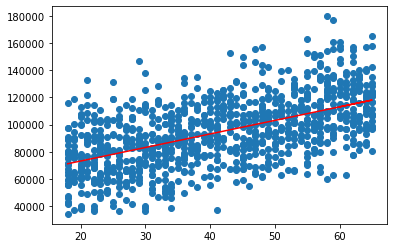

In [46]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

<AxesSubplot:xlabel='age', ylabel='income'>

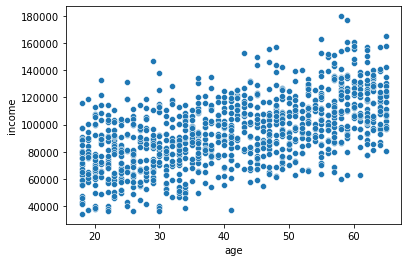

In [16]:
import seaborn as sns
sns.scatterplot(x='age',y='income',data=df2)

In [17]:
#Verificamos las correlacion entre las variables
df2.corr()

,age,performance,seniority,income,bonus
age,1.000000,-0.056875,-0.021414,0.562681,-0.414337
performance,-0.056875,1.000000,-0.021127,-0.053622,0.855500
seniority,-0.021414,-0.021127,1.000000,0.511096,0.194982
income,0.562681,-0.053622,0.511096,1.000000,-0.129481
bonus,-0.414337,0.855500,0.194982,-0.129481,1.000000


Según la correlacion podemos ver que la relación entre los ingresos y la edad es de 0.56 lo cual nos dice que puede haber relación pero no muy fuerte.

7. Escriba una conclusión a partir de los datos obtenidos en el punto anterior.

Existe una relacion directa entre el ingreso y la edad para estos cargos

8. Guarde los resultados obtenidos en cada punto en archivos planos.

In [49]:
df2.to_csv('resultados')